# Explore here

In [171]:
import pandas as pd

data_bank = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep= ';')
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [172]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [173]:
#month, day_of_week, pdays, education fuera
if data_bank.duplicated().sum():
    data_bank = data_bank.drop_duplicates()
print(data_bank.shape)
data_bank.head(10)

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [174]:
filt_data = data_bank.drop(['contact', 'month', 'day_of_week'], axis=1)
filt_data.info()
#numerica: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
#categorica: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, 

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   pdays           41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  euribor3m       41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null  obje

In [175]:
if filt_data.duplicated().sum():
    filt_data = filt_data.drop_duplicates()
print(filt_data.shape)
filt_data.head()

(41175, 18)


,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


puedo relacionar:
age con housing
education con housing
marital con loan 


dt_nio['room.n'] = pd.factorize(dt_nio["room_type"])[0]

fig, axis = plt.subplots(2, 1)

sns.regplot(data = dt_nio, x = "room.n", y = "price", ax = axis[0])
sns.heatmap(dt_nio[["price", "room.n"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_550/3139331093.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


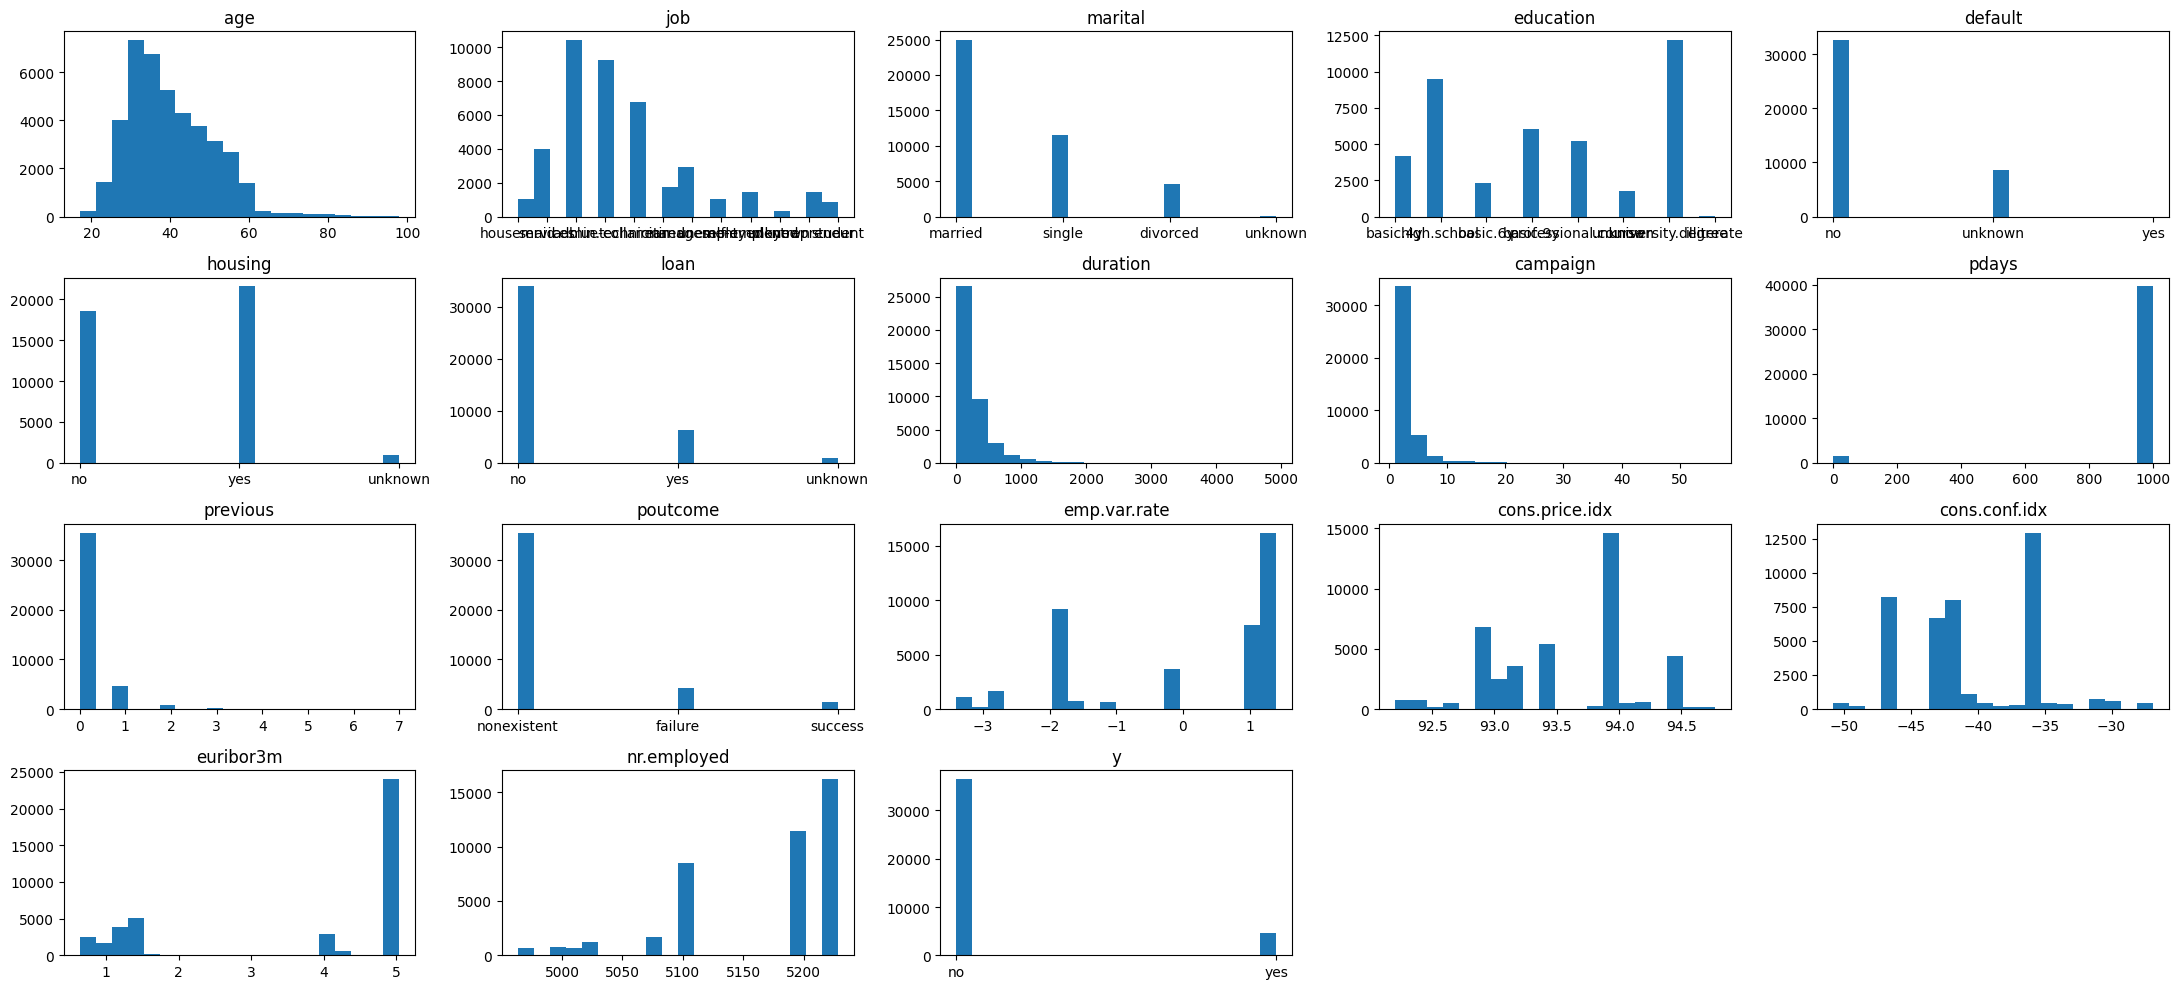

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

#numerica: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
#categorica: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, 

nrows = 4
ncols = 5

fig, axis = plt.subplots(ncols = ncols, nrows = nrows, figsize = (22, 10), constrained_layout = True)

for n, col in enumerate(filt_data.columns):
    row = n // ncols
    col_id = n % ncols
    axis[row, col_id].hist(filt_data[col], bins= 20)
    axis[row, col_id].set_title(col)
    
    
plt.tight_layout()
fig.delaxes(axis[3, 3])
fig.delaxes(axis[3, 4])
plt.show()


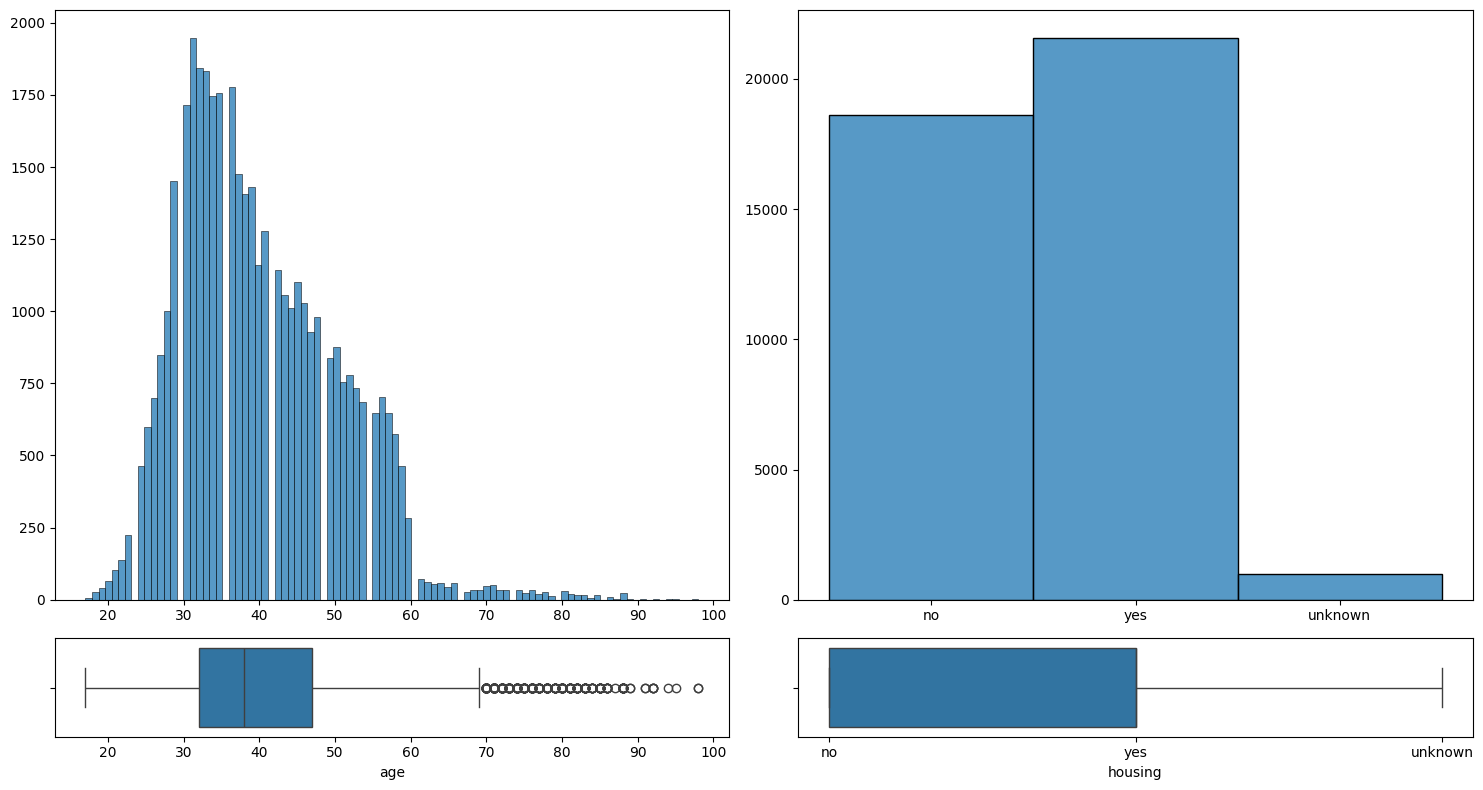

In [177]:
fig, axis = plt.subplots(2, 2, figsize= (15, 8),gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax= axis [0, 0], data = filt_data, x= 'age').set(xlabel = None, ylabel = None)
sns.boxplot(ax= axis [1, 0], data = filt_data, x= 'age')
sns.histplot(ax = axis [0, 1], data = filt_data, x = 'housing').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis [1, 1], data= filt_data, x = 'housing')

plt.tight_layout()
plt.show()

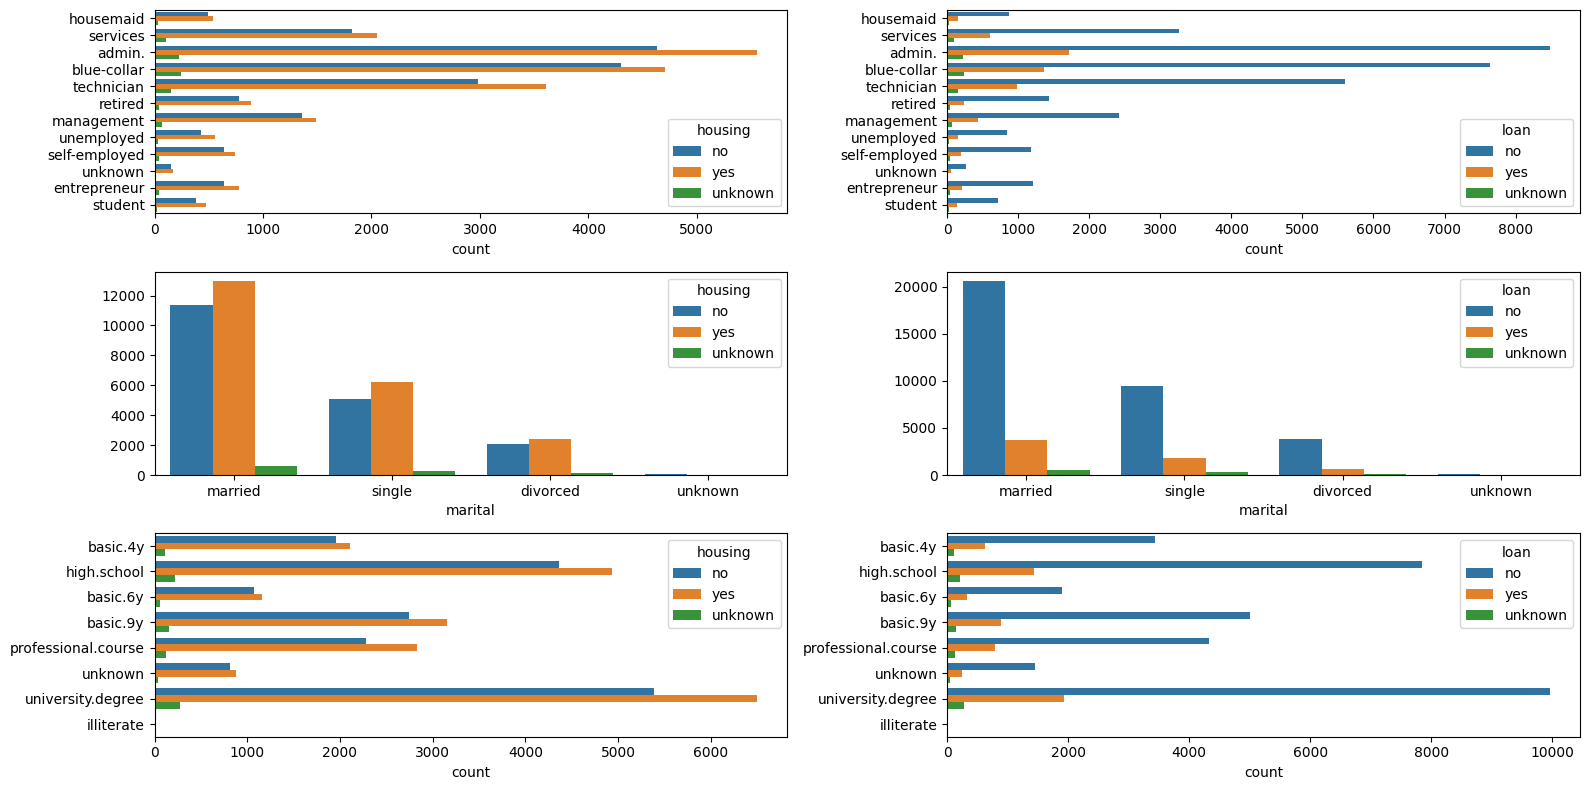

In [178]:
fig, axis = plt.subplots(3, 2, figsize= (16, 8))

sns.countplot(ax = axis [0, 0], data = filt_data, y = 'job', hue = 'housing').set(ylabel = None)
sns.countplot(ax = axis [0, 1], data = filt_data, y = 'job', hue = 'loan').set(ylabel = None)
sns.countplot(ax = axis [1, 0], data = filt_data, x = 'marital', hue = 'housing').set(ylabel = None)
sns.countplot(ax = axis [1, 1], data = filt_data, x = 'marital', hue = 'loan').set(ylabel = None)
sns.countplot(ax = axis [2, 0], data = filt_data, y = 'education', hue = 'housing').set(ylabel = None)
sns.countplot(ax = axis [2, 1], data = filt_data, y = 'education', hue = 'loan').set(ylabel = None)
plt.tight_layout()
plt.show()

In [179]:
filt_data['job_num'] = pd.factorize(filt_data['job'])[0]
filt_data['marital_num'] = pd.factorize(filt_data['marital'])[0]
filt_data['education_num'] = pd.factorize(filt_data['education'])[0]
filt_data['default_num'] = pd.factorize(filt_data['default'])[0]
filt_data['housing_num'] = pd.factorize(filt_data['housing'])[0]
filt_data['loan_num'] = pd.factorize(filt_data['loan'])[0]
filt_data['poutcome_num'] = pd.factorize(filt_data['poutcome'])[0]
filt_data['y_num'] = pd.factorize(filt_data['y'])[0]

filt_data.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,...,nr.employed,y,job_num,marital_num,education_num,default_num,housing_num,loan_num,poutcome_num,y_num
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,...,5191.0,no,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,149,1,999,...,5191.0,no,1,0,1,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,226,1,999,...,5191.0,no,1,0,1,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,151,1,999,...,5191.0,no,2,0,2,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,999,...,5191.0,no,1,0,1,0,0,1,0,0


[Text(518.3088699494949, 0.5, '')]

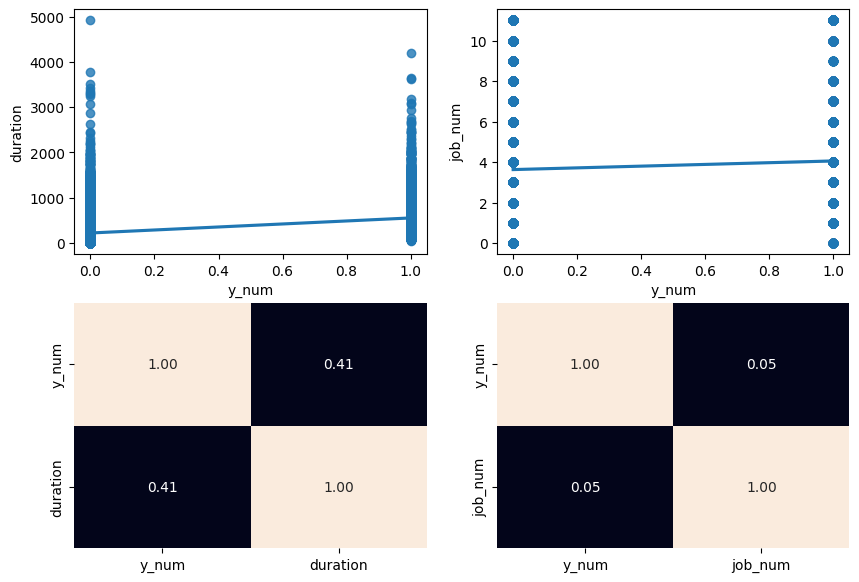

In [180]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis [0, 0], data = filt_data, x = 'y_num', y = 'duration')
sns.regplot(ax = axis [0, 1], data= filt_data, x = 'y_num', y = 'job_num')
sns.heatmap(filt_data[['y_num', 'duration']].corr(), annot= True, fmt= '.2f', ax= axis [1, 0], cbar= False).set(ylabel = None)
sns.heatmap(filt_data[['y_num', 'job_num']].corr(), annot= True, fmt= '.2f', ax= axis [1, 1], cbar= False).set(ylabel = None)

**Parece que no hay correlacion de ningun tipo**

[Text(33.081597222222214, 0.5, '')]

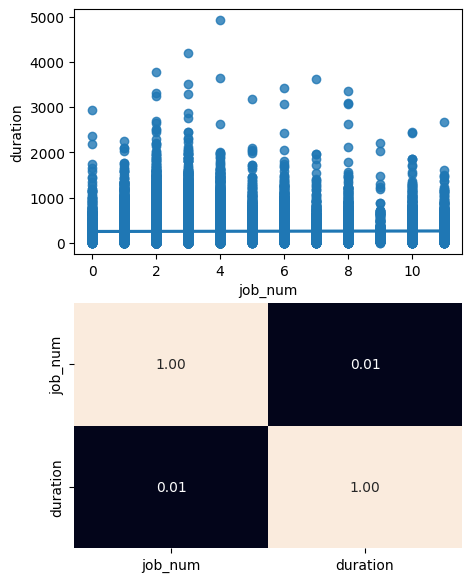

In [181]:
fig, axis = plt.subplots (2, 1, figsize = (5, 7))

sns.regplot(ax = axis [0], data = filt_data, x = 'job_num', y = 'duration')
sns.heatmap(filt_data[['job_num', 'duration']].corr(), annot= True, fmt = '.2f', ax= axis [1], cbar= False).set(ylabel = None)

<Axes: xlabel='marital_num', ylabel='count'>

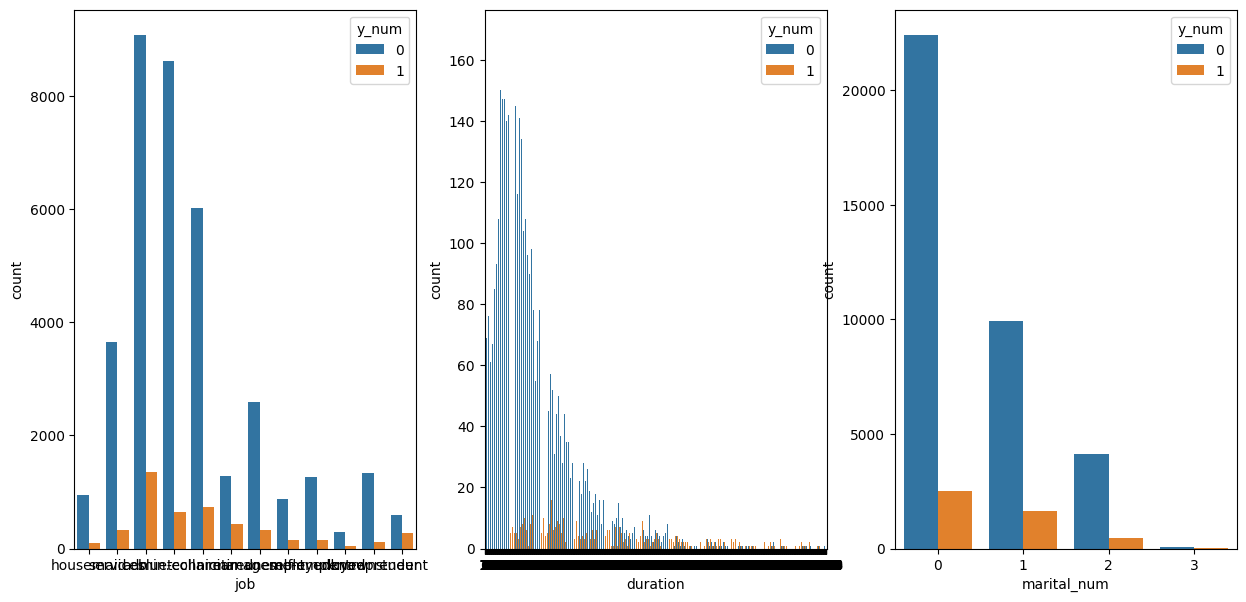

In [182]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.countplot(ax = axis[0], data = filt_data, x= 'job', hue= 'y_num')
sns.countplot(ax = axis [1], data = filt_data, x = 'duration', hue = 'y_num')
sns.countplot(ax = axis [2], data = filt_data, x = 'marital_num', hue= 'y_num')


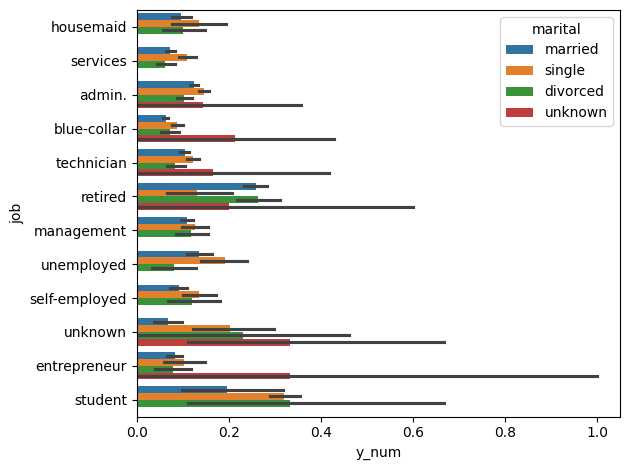

In [183]:
sns.barplot( data = filt_data, x = 'y_num', y = 'job', hue = 'marital')

plt.tight_layout()

plt.show()

<Axes: >

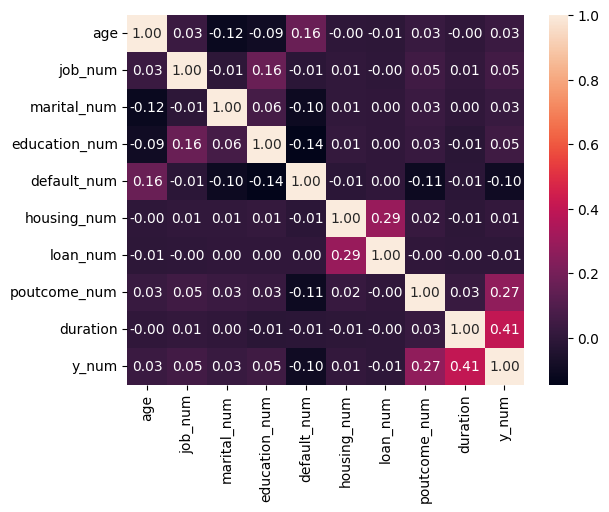

In [184]:
sns.heatmap(filt_data[['age', 'job_num', 'marital_num', 'education_num', 'default_num', 'housing_num', 'loan_num', 'poutcome_num', 'duration', 'y_num']].corr(), annot= True, fmt ='.2f')


**La edad, la educación, el tipo de trabajo y el estado civil no están relacionadas con los préstamos.**


In [185]:
filt_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_num,marital_num,education_num,default_num,housing_num,loan_num,poutcome_num,y_num
count,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.00000,41175.000000,41175.000000
mean,40.023679,258.319150,2.567917,962.463922,0.173018,0.081897,93.575710,-40.502963,3.621263,5167.034288,3.673880,0.510650,3.277377,0.208889,0.571973,0.19983,0.169957,0.112665
std,10.420778,259.307587,2.770341,186.939285,0.494970,1.570894,0.578842,4.627872,1.734447,72.252145,2.454367,0.696798,2.185584,0.406699,0.541216,0.45606,0.455816,0.316187
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,4.000000,1.000000,6.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,11.000000,3.000000,7.000000,2.000000,2.000000,2.00000,2.000000,1.000000


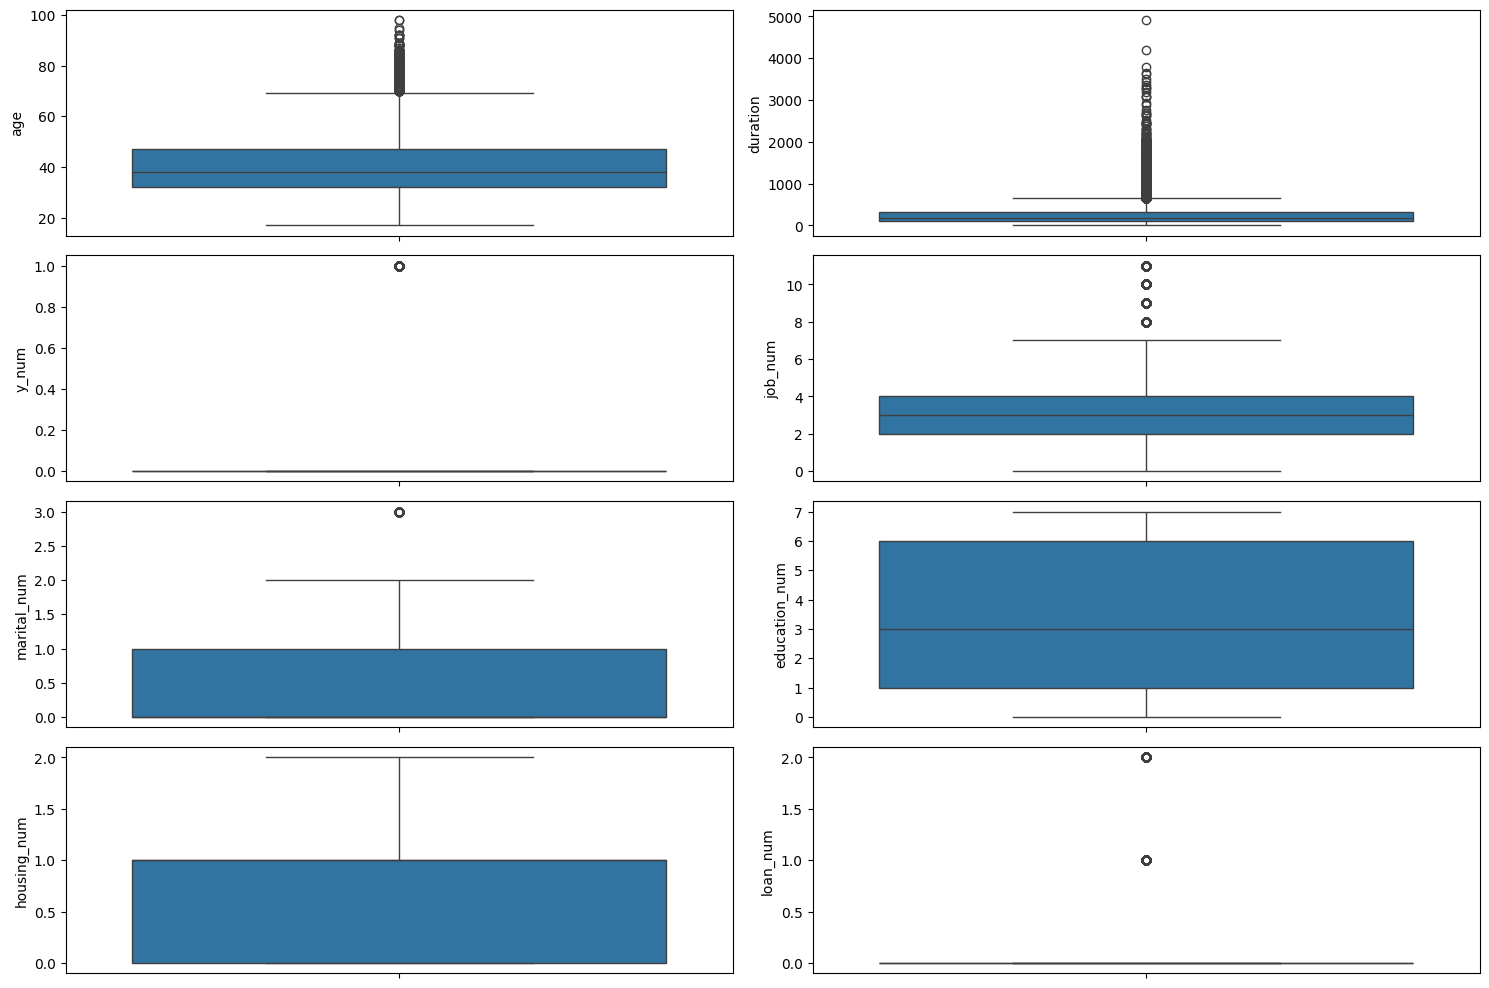

In [186]:
fig, axis = plt.subplots(4, 2, figsize =(15, 10))

sns.boxplot(ax = axis [0, 0], data= filt_data, y = 'age')
sns.boxplot(ax= axis [0, 1], data= filt_data, y = 'duration')
sns.boxplot(ax= axis [1, 0], data= filt_data, y = 'y_num')
sns.boxplot(ax= axis [1, 1], data= filt_data, y = 'job_num')
sns.boxplot(ax= axis [2, 0], data= filt_data, y = 'marital_num')
sns.boxplot(ax= axis [2, 1], data= filt_data, y = 'education_num')
sns.boxplot(ax= axis [3, 0], data= filt_data, y = 'housing_num')
sns.boxplot(ax= axis [3, 1], data= filt_data, y = 'loan_num')

#numerica: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
#categorica: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y

plt.tight_layout()

plt.show()

In [187]:
duration_sts = filt_data['duration'].describe()
duration_sts

count    41175.000000
mean       258.319150
std        259.307587
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [188]:
duration_itval = duration_sts['75%'] - duration_sts['25%']
upper_lim = duration_sts['75%'] + 1.5 * duration_itval
lower_lim = duration_sts['25%'] - 1.5 * duration_itval

print(f"The upper and lower limits for finding outliers are {round(upper_lim, 2)} and {round(lower_lim, 2)}, with an interquartile range of {round(duration_itval, 2)}")

The upper and lower limits for finding outliers are 644.5 and -223.5, with an interquartile range of 217.0


In [189]:
filt_data[(filt_data['duration']< 500)]

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,...,nr.employed,y,job_num,marital_num,education_num,default_num,housing_num,loan_num,poutcome_num,y_num
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,...,5191.0,no,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,149,1,999,...,5191.0,no,1,0,1,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,226,1,999,...,5191.0,no,1,0,1,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,151,1,999,...,5191.0,no,2,0,2,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,999,...,5191.0,no,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,999,...,4963.6,yes,5,0,4,0,1,0,0,1
41184,46,blue-collar,married,professional.course,no,no,no,383,1,999,...,4963.6,no,3,0,4,0,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,189,2,999,...,4963.6,no,5,0,6,0,1,0,0,0
41186,44,technician,married,professional.course,no,no,no,442,1,999,...,4963.6,yes,4,0,4,0,0,0,0,1


In [190]:
# filt_data[(filt_data['duration']< 500) & (filt_data['y_num']== 0)]

In [191]:
filt_data.isnull().sum().sort_values(ascending=False)

age               0
job               0
poutcome_num      0
loan_num          0
housing_num       0
default_num       0
education_num     0
marital_num       0
job_num           0
y                 0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
duration          0
loan              0
housing           0
default           0
education         0
marital           0
y_num             0
dtype: int64

**No hay valores nulos, no hay que quitar filas**

In [192]:
filt_data['y_num'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: y_num, dtype: int64

In [193]:
from sklearn.model_selection import train_test_split

num_var = ['age' ,'job_num','marital_num', 'education_num','default_num','housing_num', 'y_num', 'loan_num', 'poutcome_num','duration', 'campaign', 'euribor3m']

filt_data = filt_data[num_var]

#Divido dataset en train y test
X = filt_data.drop('y_num', axis =1)
y = filt_data['y_num']

**Split**

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 11)

X_train.head()

X_train.to_csv('../data/processed/Xtrain.csv', index=False)
X_test.to_csv('../data/processed/Xtest.csv', index=False)
y_train.to_csv('../data/processed/ytrain.csv', index=False, header=['y_num'])
y_test.to_csv('../data/processed/ytest.csv', index=False, header=['y_num'])

**Feature Selection**

In [195]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k= int(len(X_train.columns) * 0.7))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel= pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

y_train.head()

1711     0
38202    0
14119    0
31939    1
20125    0
Name: y_num, dtype: int64

In [196]:
X_test.head()

,age,job_num,marital_num,education_num,default_num,housing_num,loan_num,poutcome_num,duration,campaign,euribor3m
22375,57,5,0,1,0,0,0,0,92,9,4.964
32903,35,3,0,0,0,1,0,0,386,1,1.299
27817,88,5,2,0,0,0,0,0,203,2,1.663
6343,32,3,1,1,0,1,0,0,124,2,4.857
10507,46,2,1,6,0,1,0,0,198,1,4.961


In [197]:
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

scalern = MinMaxScaler()
X_train_scal = pd.DataFrame(scalern.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scal = pd.DataFrame(scalern.fit_transform(X_test), columns= X_test.columns, index= X_test.index)

X_train_scal.to_csv('/workspaces/machine-learning-python-template/data/processed/data_bank_train_X_minmax.csv', index= False)
X_test_scal.to_csv('/workspaces/machine-learning-python-template/data/processed/data_bank_test_X_minmax.csv', index= False)
dump(scalern, open('/workspaces/machine-learning-python-template/models/minmax_scaler.pk', 'wb'))

#X_test_sccal.head()
X_train_scal.head()

,age,job_num,marital_num,education_num,default_num,housing_num,loan_num,poutcome_num,duration,campaign,euribor3m
1711,0.172840,0.363636,0.000000,0.571429,0.0,0.0,0.0,0.0,0.061443,0.018182,0.956926
38202,0.567901,0.454545,0.000000,0.142857,0.0,0.5,0.0,0.0,0.076923,0.000000,0.024031
14119,0.271605,0.272727,0.333333,0.142857,0.0,0.5,0.5,0.0,0.065730,0.036364,0.981183
31939,0.135802,0.181818,0.333333,0.142857,0.5,0.0,0.0,0.0,0.331269,0.018182,0.157107
20125,0.419753,0.363636,0.000000,0.571429,0.5,0.5,0.5,0.0,0.065015,0.000000,0.981864


In [198]:
X_train_scal.head()

,age,job_num,marital_num,education_num,default_num,housing_num,loan_num,poutcome_num,duration,campaign,euribor3m
1711,0.172840,0.363636,0.000000,0.571429,0.0,0.0,0.0,0.0,0.061443,0.018182,0.956926
38202,0.567901,0.454545,0.000000,0.142857,0.0,0.5,0.0,0.0,0.076923,0.000000,0.024031
14119,0.271605,0.272727,0.333333,0.142857,0.0,0.5,0.5,0.0,0.065730,0.036364,0.981183
31939,0.135802,0.181818,0.333333,0.142857,0.5,0.0,0.0,0.0,0.331269,0.018182,0.157107
20125,0.419753,0.363636,0.000000,0.571429,0.5,0.5,0.5,0.0,0.065015,0.000000,0.981864


In [199]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

#creo scaler
scaler = StandardScaler()

#Ajusto el escalador a los datos de entrenamiento y transformo
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = X_train.columns)

#transformo test data
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index= X_test.index, columns= X_test.columns)

#Guardo mis datos normalizados
X_train_norm.to_csv('/workspaces/machine-learning-python-template/data/processed/data_bank_train_X_norm.csv', index= False)
X_test_norm.to_csv('/workspaces/machine-learning-python-template/data/processed/data_bank_test_X_norm.csv', index= False)

#exporto datos escalados
dump(scaler, open('/workspaces/machine-learning-python-template/models/normal_scaler.pk', 'wb'))

X_train_norm.head()

,age,job_num,marital_num,education_num,default_num,housing_num,loan_num,poutcome_num,duration,campaign,euribor3m
1711,-0.866345,0.137094,-0.733467,0.32667,-0.514523,-1.056317,-0.436504,-0.374664,-0.001387,-0.207371,0.712076
38202,2.212954,0.544591,-0.733467,-1.04707,-0.514523,0.793304,-0.436504,-0.374664,0.250485,-0.566510,-1.659890
14119,-0.096520,-0.270403,0.698855,-1.04707,-0.514523,0.793304,1.765063,-0.374664,0.068362,0.151767,0.773753
31939,-1.155029,-0.677899,0.698855,-1.04707,1.941411,-1.056317,-0.436504,-0.374664,4.388935,-0.207371,-1.321532
20125,1.058217,0.137094,-0.733467,0.32667,1.941411,0.793304,1.765063,-0.374664,0.056737,-0.566510,0.775482


In [200]:
y_train.head(15)

1711     0
38202    0
14119    0
31939    1
20125    0
9797     0
16006    0
7859     0
207      0
29649    1
17090    1
2769     0
5029     0
14194    0
32490    0
Name: y_num, dtype: int64

In [201]:
# X_train_sel['y_num'] = y_train
# X_test_sel['y_num'] = y_test

# X_train_sel.to_csv('/workspaces/machine-learning-python-template/data/processed/data_bank_train_X.csv', index=False)
# X_test_sel.to_csv('/workspaces/machine-learning-python-template/data/processed/data_bank_test_X.csv', index=False)

# # Guardar las variables objetivo en archivos CSV
# y_train.to_csv('/workspaces/machine-learning-python-template/data/processed/data_bank_train_Y.csv', index=False, header=['y_num'])
# y_test.to_csv('/workspaces/machine-learning-python-template/data/processed/data_bank_test_Y.csv', index=False, header=['y_num'])

# X_test_sel.head()

In [202]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=11, solver= 'newton-cholesky')
model.fit(X_train, y_train)

LogisticRegression(random_state=11, solver='newton-cholesky')

In [203]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [204]:
accuracy_score(y_test, y_pred)

0.9016393442622951